In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_boston
pd.set_option('display.max_columns',None)

In [13]:
 data = load_boston()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [15]:
df = pd.DataFrame(data.data , columns = data.feature_names)
df['price'] = data.target

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
## first of all lets convert our feature names to lowercase and strip 
## if there is any extra space

df.columns = [col.strip().lower() for col in df.columns]

In [21]:
df.shape

(506, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [24]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [26]:
### there are no null values in the data

In [27]:
## lets look at correlation 
## we are looking for two cases here
## 1. correlation of independent features with dependent features
## 2. correlation of independend features with independent features
### if 2nd type of correation is more than normal then we can drop one column|

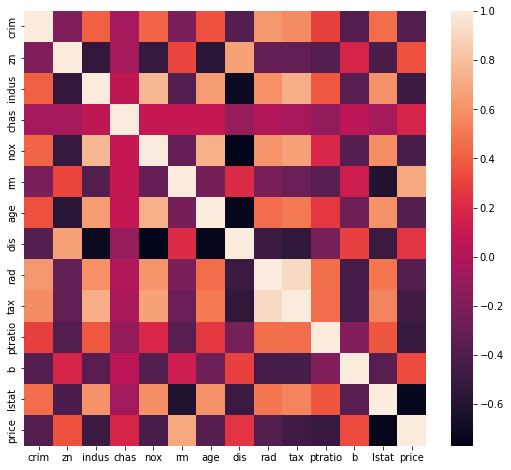

In [28]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())
plt.show()

<Figure size 1080x1008 with 0 Axes>

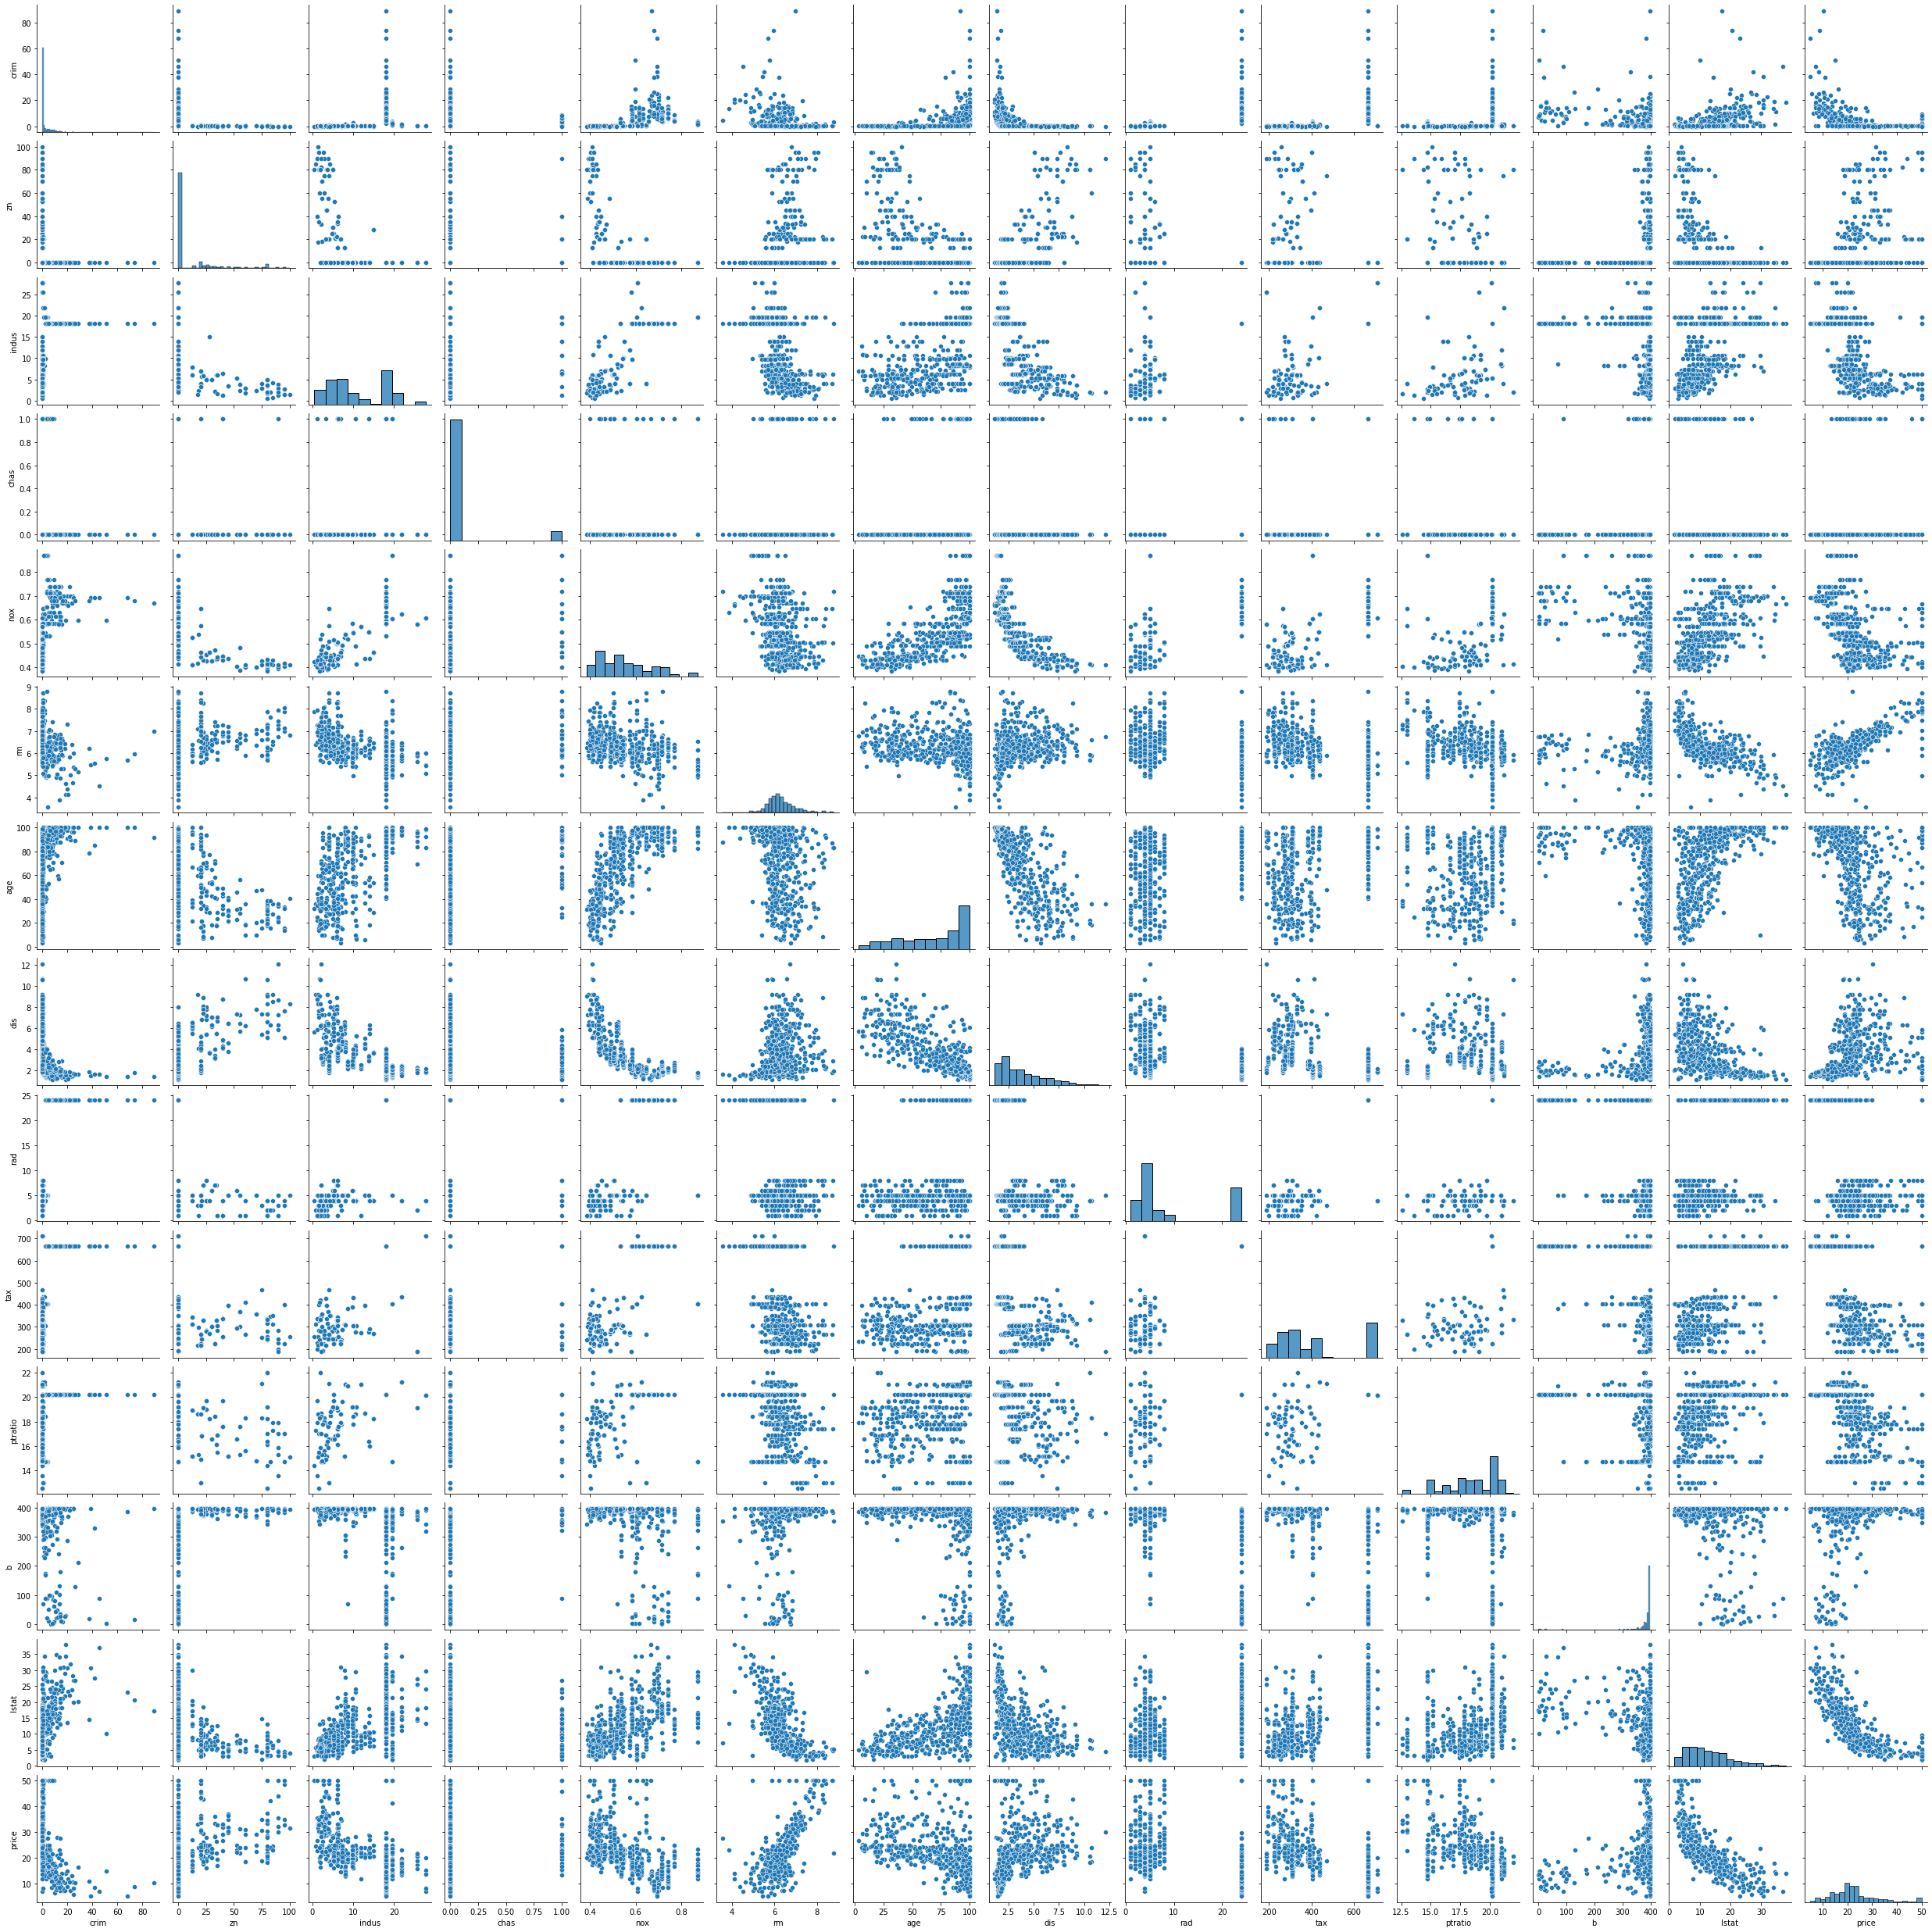

In [30]:
plt.figure(figsize=(15,14))
sns.pairplot(df)
plt.show()

In [31]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, ' price')

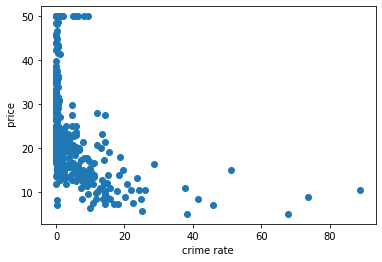

In [34]:
plt.scatter(x= df['crim'],y = df['price'])
plt.xlabel('crime rate')
plt.ylabel(' price')

In [38]:
## as we can see above , as the crime rate is increasing the price is decreasing

Text(0, 0.5, ' price')

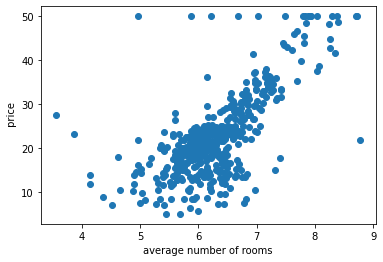

In [35]:
plt.scatter(x= df['rm'],y = df['price'])
plt.xlabel('average number of rooms')
plt.ylabel(' price')

In [39]:
## as the number of rooms is increasing the price is increasing

<AxesSubplot:xlabel='rm', ylabel='price'>

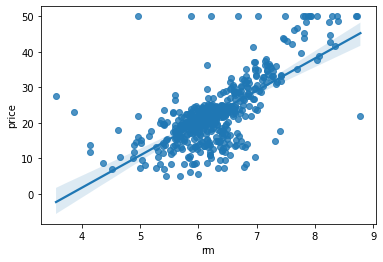

In [36]:
sns.regplot(x= 'rm' , y = 'price' , data = df)

Text(0, 0.5, ' price')

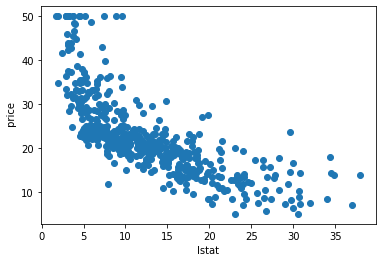

In [37]:
plt.scatter(x= df['lstat'],y = df['price'])
plt.xlabel('lstat')
plt.ylabel(' price')

In [40]:
## negative correlation between lower status of population and price


<AxesSubplot:xlabel='ptratio', ylabel='price'>

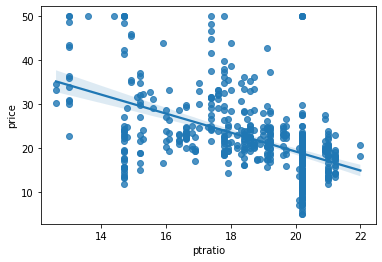

In [41]:
sns.regplot(x ='ptratio',y ='price',data = df)

In [42]:
### so there is some negative coorelation here

In [43]:
### lets check for all the columns 

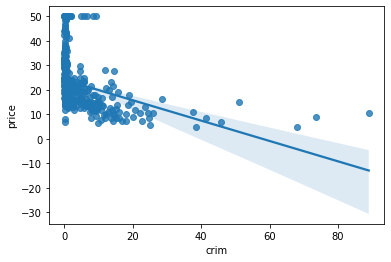

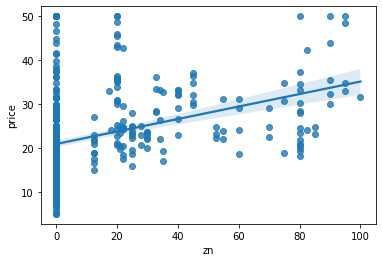

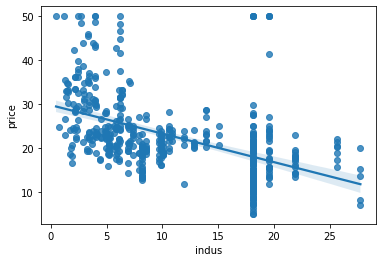

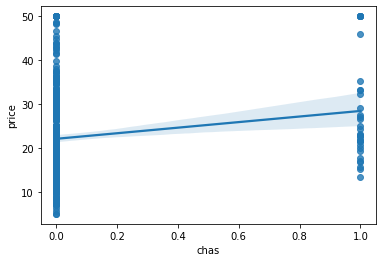

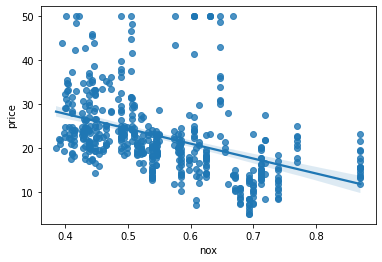

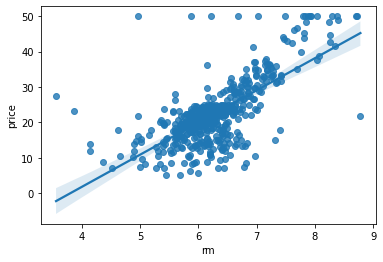

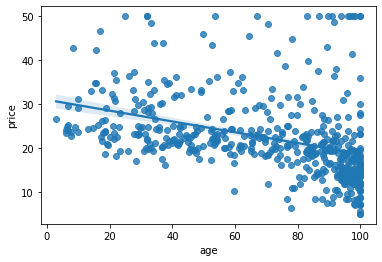

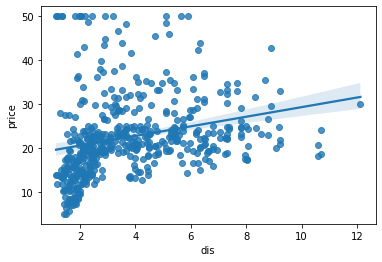

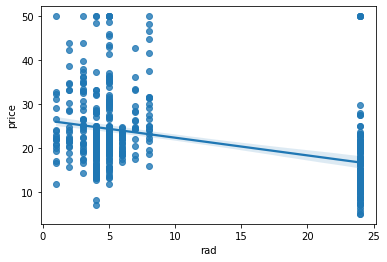

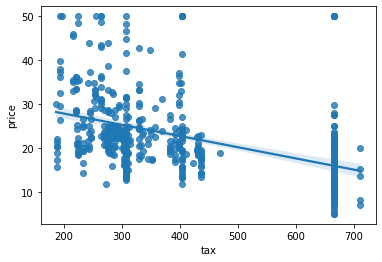

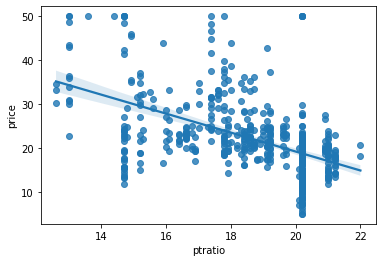

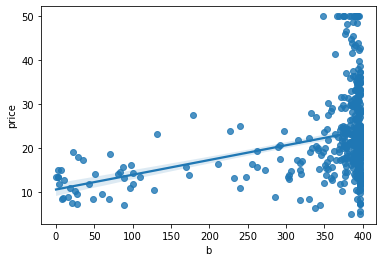

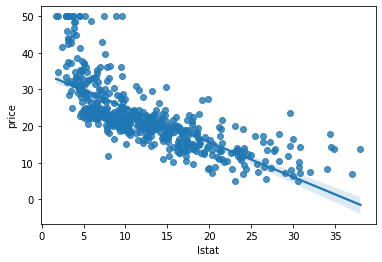

In [45]:
for i in df.columns:
    dummy  = df.copy()
    if(i == 'price'): 
        pass
    else:
        plt.figure()
        sns.regplot(x = i , y = 'price' , data = dummy)
        plt.show()

In [46]:
### independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [58]:
### train test split

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.3 , random_state = 43)

In [59]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [60]:
### standaradizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [61]:
X_train = scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

### Model training

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train , y_train)

LinearRegression()

In [69]:
### print the coefficients

print(model.coef_)

[-0.22322921  1.05675371  0.25002306  0.63872847 -2.02281018  2.5812825
  0.62843535 -2.57820057  2.98731534 -2.34581838 -2.21602079  1.01770219
 -4.23118848]


In [71]:
print(model.intercept_)

22.96016949152543


In [74]:
### on which parameters the model is trained
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [75]:
### prediction with test data
y_pred=  model.predict(X_test)

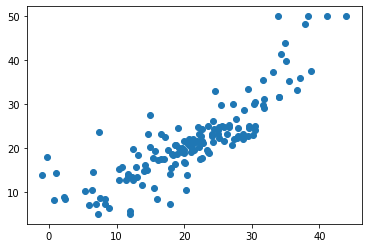

In [77]:
### plot a scatter plot for prediction
plt.scatter(y_pred , y_test)

In [78]:
    ### error
    residuals = y_test - y_pred

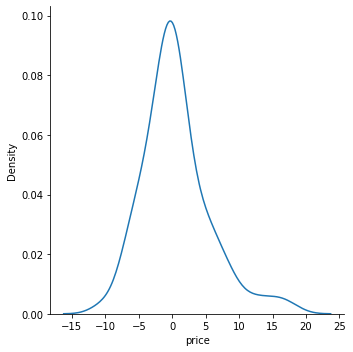

In [80]:
##plotting the residuals


sns.displot(residuals , kind='kde')

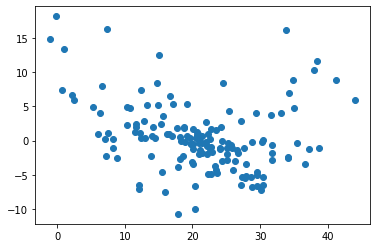

In [81]:
### scatter plot with respect to predictions and residuals
### uninform distribution is there (comment added after plotting)
plt.scatter(y_pred , residuals)

In [86]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print("mean squared error: ", mse(y_test , y_pred))
print("mean absolute error: " , mae(y_test , y_pred))
print("root mean squared error: " , np.sqrt(mse(y_test,y_pred)))

mean squared error:  25.4088903147548
mean absolute error:  3.5885469617762573
root mean squared error:  5.040723193625573


In [87]:
## adjusted r square and r square
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)


0.6913275838214494


In [88]:
### adjsuteed

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6622497475147744

### new data prediction

In [94]:
data.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [95]:
### before passing this to model to need to pass it to scaler to standaradize it
new_data =scaler.transform(data.data[0].reshape(1,-1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [97]:
new_pred = model.predict(new_data)

In [98]:
new_pred

array([30.44732014])

In [99]:
#### pickle the model file for deployment
import pickle

In [101]:
pickle.dump(model , open('regmodel.pkl','wb'))